In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
all_df=pd.read_csv('Concrete_Data.csv', index_col=False)
all_df.head()

,ID,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,1000,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1001,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,1002,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,1003,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,1004,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
all_df.drop('ID', axis=1, inplace=True)
all_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(all_df)

      cement   blast_furnace_slag  fly_ash  water  superplasticizer  \
0       540.0                 0.0      0.0  162.0               2.5   
1       540.0                 0.0      0.0  162.0               2.5   
2       332.5               142.5      0.0  228.0               0.0   
3       332.5               142.5      0.0  228.0               0.0   
4       198.6               132.4      0.0  192.0               0.0   
...       ...                 ...      ...    ...               ...   
1025    276.4               116.0     90.3  179.6               8.9   
1026    322.2                 0.0    115.6  196.0              10.4   
1027    148.5               139.4    108.6  192.7               6.1   
1028    159.1               186.7      0.0  175.6              11.3   
1029    260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate   fine_aggregate  age  concrete_compressive_strength  
0                1040.0           676.0   28                         

In [5]:
X = all_df.drop('concrete_compressive_strength', axis=1)

<Axes: >

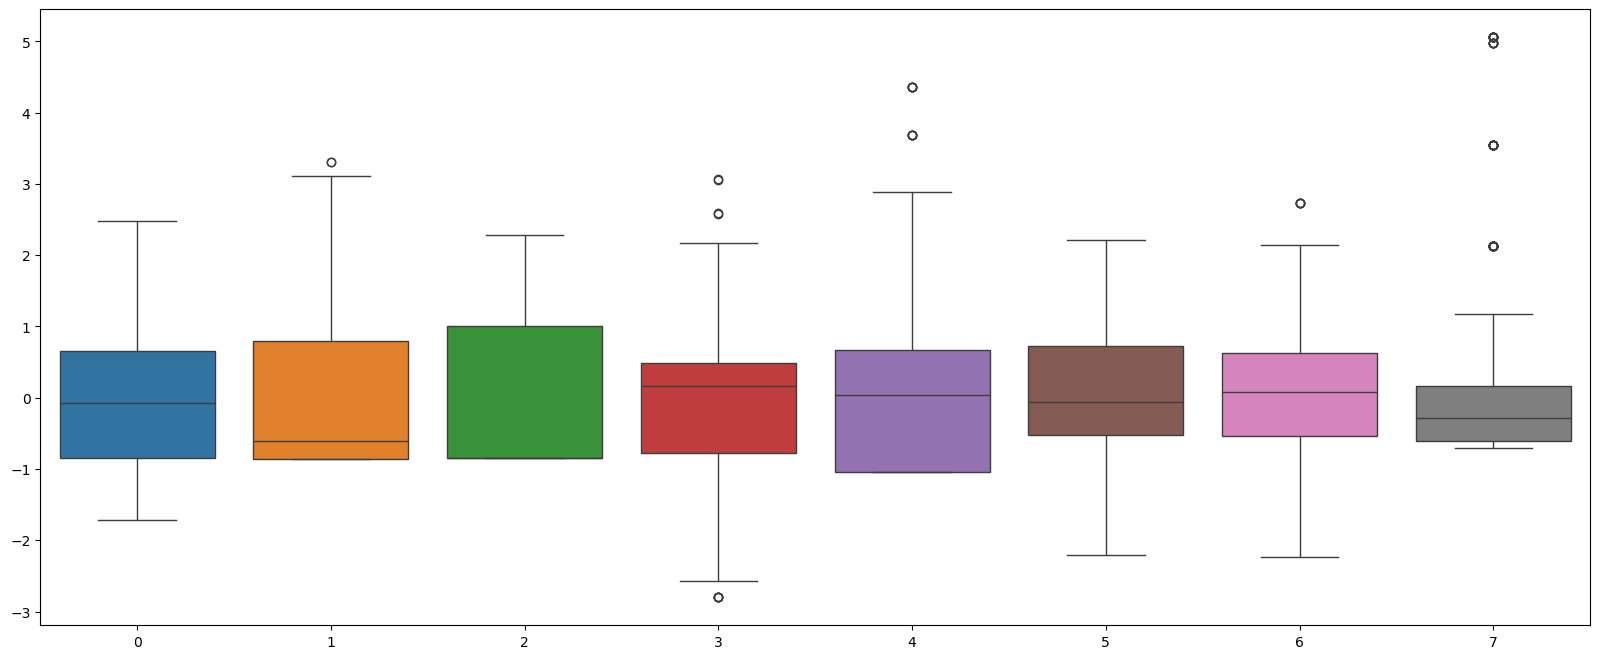

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

In [7]:
# assign numerical label to y
y = all_df['concrete_compressive_strength']

In [8]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3,
random_state=1)

In [21]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error

In [23]:
svr_reg = SVR(C=1.0, kernel='rbf', degree=3, gamma='auto')

In [25]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [27]:
scores = cross_val_score(svr_reg, Xs_train, y_train, cv=5, scoring=mse_scorer)

In [33]:
mean_mse = -np.mean(scores) 
std_mse = np.std(scores)

In [39]:
print(f"Average MSE from cross-validation: {mean_mse:.2f} ± {std_mse:.2f}")

Average MSE from cross-validation: 111.17 ± 7.25


In [41]:
y_pred = cross_val_predict(svr_reg, Xs_train, y_train, cv=5)

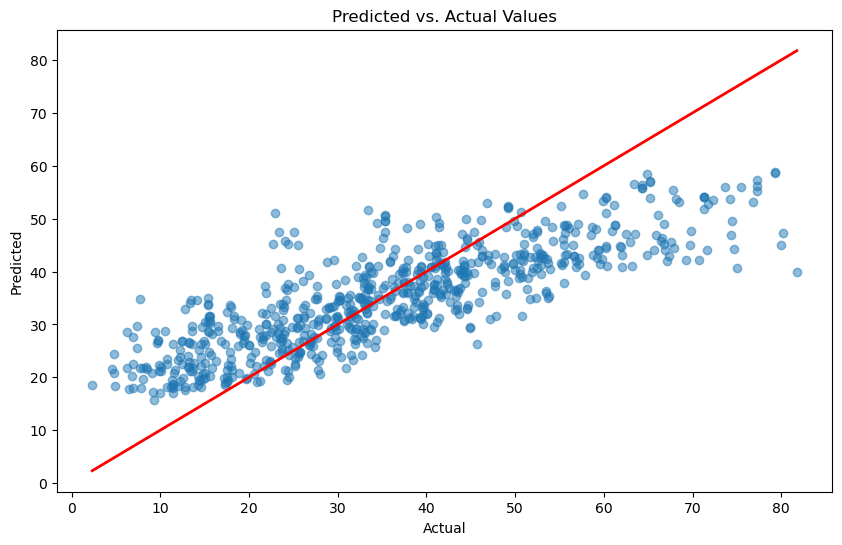

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train.min(), y_pred.min()), max(y_train.max(), y_pred.max())],
         [min(y_train.min(), y_pred.min()), max(y_train.max(), y_pred.max())], 'r-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.show()